OBJECTIVE - Improve customer experience by analysing sales data and increase Revenue.

In [1]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
# import csv file
df = pd.read_csv("Diwali Sales Data.csv", encoding= 'unicode_escape')

In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,Unnamed
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [14]:
df.shape

(11251, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age               11251 non-null  int64  
 5   Marital_Status    11251 non-null  int64  
 6   State             11251 non-null  object 
 7   Zone              11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  int64  
 11  Amount            11239 non-null  float64
 12  Status            0 non-null      float64
 13  Unnamed           0 non-null      float64
dtypes: float64(3), int64(4), object(7)
memory usage: 1.2+ MB


In [11]:
#dropping unrelated/blank columns
df.drop(['Status','Unnamed'], axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age               11251 non-null  int64  
 5   Marital_Status    11251 non-null  int64  
 6   State             11251 non-null  object 
 7   Zone              11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  int64  
 11  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 1.0+ MB


In [17]:
#check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [18]:
# Filter rows with at least one null value
row_with_nulls = df[df.isnull().any(axis=1)]
print(row_with_nulls)

     User_ID Cust_name Product_ID Gender  Age  Marital_Status           State  \
7    1002092  Shivangi  P00273442      F   61               0     Maharashtra   
14   1003858      Cano  P00293742      M   46               1  Madhya Pradesh   
16   1005447       Amy  P00275642      F   48               1  Andhra Pradesh   
109  1005265    Sakshi  P00296242      F   48               1           Delhi   
111  1005261   Apoorva  P00057942      F   41               1           Delhi   
184  1005538    Kartik  P00269542      F   49               1       Karnataka   
293  1000326  Jonathan  P00120542      M   53               0         Gujarat   
344  1002507   Lakshmi  P00045842      F   35               1         Gujarat   
345  1004498   Srishti  P00030842      F   55               0           Delhi   
452  1004601    Gaurav  P00014442      F   40               1  Madhya Pradesh   
464  1004528    Anurag  P00338442      F   33               1   Uttar Pradesh   
493  1002994    Hemant   P00

In [19]:
# Calculate mean for each category and fill NA with mean for that category
df['Amount'] = df.groupby('Product_Category')['Amount'].transform(lambda  x:x.fillna(x.mean()))

In [27]:
#Getting confirmation on amount column has mean value added or not.
selected_rows = df[(df['User_ID'] == 1000326) & (df['Product_ID'] == 'P00120542')]
print(selected_rows)

     User_ID Cust_name Product_ID Gender  Age  Marital_Status    State  \
293  1000326  Jonathan  P00120542      M   53               0  Gujarat   

        Zone Occupation  Product_Category  Orders        Amount  
293  Western  IT Sector  Footwear & Shoes       3  14707.468791  


In [28]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [29]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [31]:
df['Amount'].dtype

dtype('int32')

In [32]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount'],
      dtype='object')

In [38]:
#rename column
df.rename(columns = {'Marital_Status' : 'Married'})

,User_ID,Cust_name,Product_ID,Gender,Age,Married,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [40]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9460.454626
std,1.716125e+03,12.754122,0.493632,1.115047,5224.434220
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,0.000000,2.000000,8110.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12691.500000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [42]:
# use describe() for specific columns
df[['Age', 'Orders','Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11251.000000
mean,35.421207,2.489290,9460.454626
std,12.754122,1.115047,5224.434220
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.500000
50%,33.000000,2.000000,8110.000000
75%,43.000000,3.000000,12691.500000
max,92.000000,4.000000,23952.000000


In [43]:
# Define a function to categorize age
def categorize_age(age):
    if age <= 17:
        return '0-17'
    elif age <= 25:
        return '18-25'
    elif age <= 35:
        return '26-35'
    elif age <= 45:
        return '36-45'
    elif age <= 50:
        return '46-50'
    elif age <= 55:
        return '51-55'
    else:
        return '55+'

In [46]:
# Apply the function to create a new column 'age_group'
df['Age_group'] = df['Age'].apply(categorize_age)
print(df)

       User_ID    Cust_name Product_ID Gender  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F   28               0   
1      1000732       Kartik  P00110942      F   35               1   
2      1001990        Bindu  P00118542      F   35               1   
3      1001425       Sudevi  P00237842      M   16               0   
4      1000588         Joni  P00057942      M   28               1   
...        ...          ...        ...    ...  ...             ...   
11246  1000695      Manning  P00296942      M   19               1   
11247  1004089  Reichenbach  P00171342      M   33               0   
11248  1001209        Oshin  P00201342      F   40               0   
11249  1004023       Noonan  P00059442      M   37               0   
11250  1002744      Brumley  P00281742      F   19               0   

                State      Zone       Occupation Product_Category  Orders  \
0         Maharashtra   Western       Healthcare             Auto       1   
1    

# Exploratory Data Analysis [EDA]

In [47]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount',
       'Age_group'],
      dtype='object')

GENDER

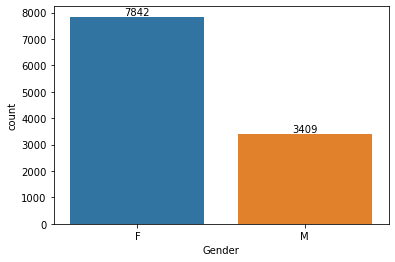

In [59]:
# plotting a bar chart for Gender and it's count
ax = sns.countplot(x='Gender', data=df)

for i in ax.containers:
    ax.bar_label(i)

In [65]:
sales_by_gender = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by="Amount", ascending=False)

print(sales_by_gender)

  Gender    Amount
0      F  74491401
1      M  31948174


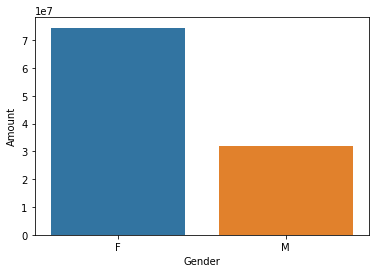

In [72]:
ax = sns.barplot(x='Gender', y='Amount', data=sales_by_gender)

From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

AGE

In [74]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount',
       'Age_group'],
      dtype='object')

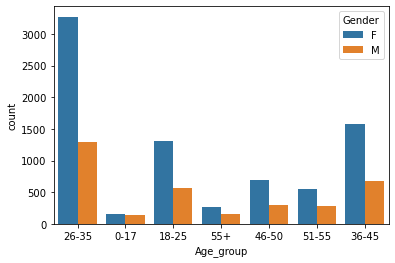

In [75]:
ax = sns.countplot(x='Age_group', data=df, hue='Gender')

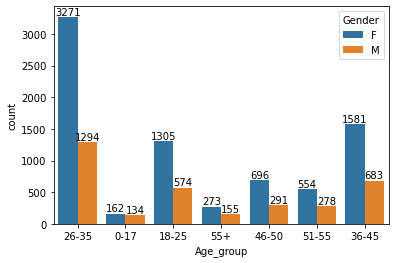

In [76]:
ax = sns.countplot(x='Age_group', data=df, hue='Gender')

for i in ax.containers:
    ax.bar_label(i)

In [77]:
# Total Amount vs Age Group
sales_by_age = df.groupby(df['Age_group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
print(sales_by_age)

  Age_group    Amount
2     26-35  42881671
3     36-45  21947810
1     18-25  17240732
4     46-50   9277640
5     51-55   8290891
6       55+   4101178
0      0-17   2699653


<AxesSubplot:xlabel='Age_group', ylabel='Amount'>

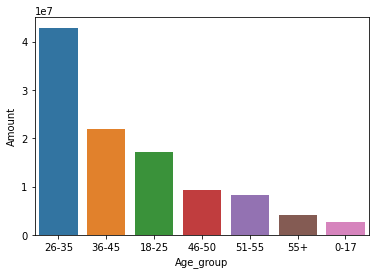

In [79]:
sns.barplot(x='Age_group',y='Amount', data=sales_by_age)

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

STATE

In [80]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount',
       'Age_group'],
      dtype='object')

In [83]:
# total number of orders from top 5 states
sales_by_state_order = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(5)
print(sales_by_state_order)

             State  Orders
14   Uttar Pradesh    4813
10     Maharashtra    3811
7        Karnataka    3241
2            Delhi    2744
9   Madhya Pradesh    2259


<AxesSubplot:xlabel='State', ylabel='Orders'>

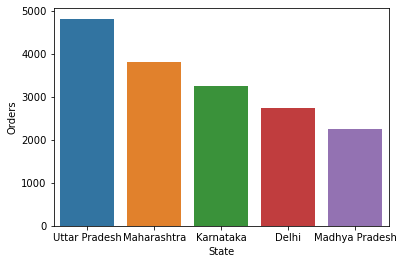

In [84]:
sns.barplot(x='State', y='Orders', data=sales_by_state_order)

In [85]:
# total amount/sales from top 5 states
sales_by_state_amount = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)
print(sales_by_state_amount)

             State    Amount
14   Uttar Pradesh  19402224
10     Maharashtra  14447734
7        Karnataka  13538247
2            Delhi  11647939
9   Madhya Pradesh   8134961


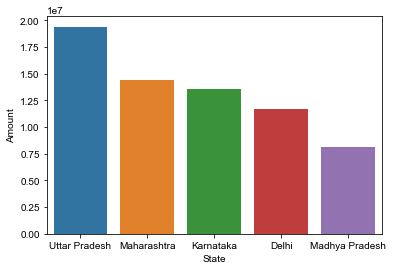

In [88]:
sns.barplot(x='State', y='Amount', data=sales_by_state_amount)
sns.set(rc={'figure.figsize':(15,5)})

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*

MARITAL STATUS

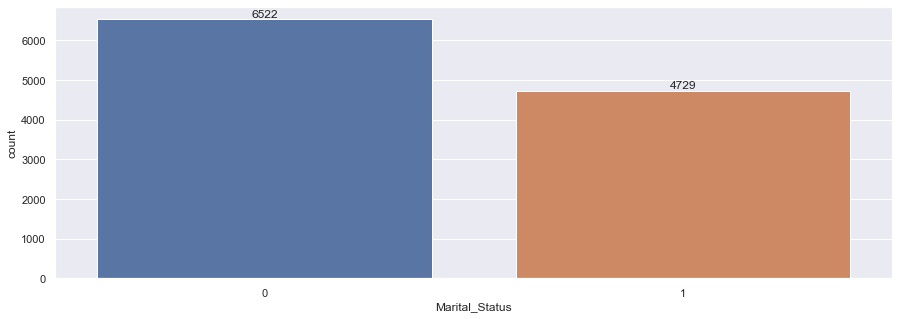

In [90]:
ax = sns.countplot(x='Marital_Status', data=df)

for i in ax.containers:
    ax.bar_label(i)

In [93]:
sales_by_Marital_Status = df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
print(sales_by_Marital_Status)

   Marital_Status Gender    Amount
0               0      F  43835172
2               1      F  30656229
1               0      M  18353445
3               1      M  13594729


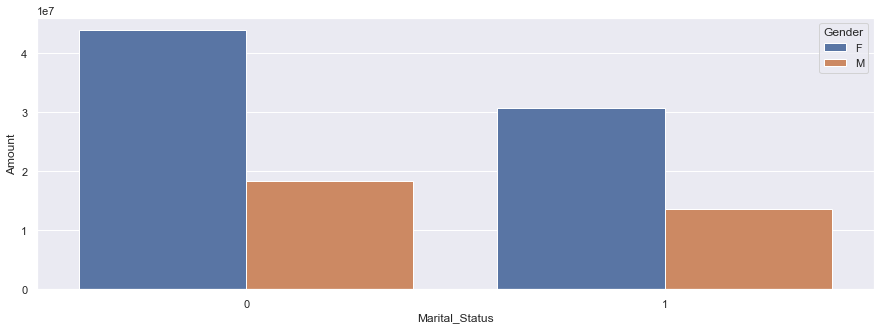

In [95]:
sns.barplot(x='Marital_Status', y='Amount', hue='Gender', data=sales_by_Marital_Status)
sns.set(rc={'figure.figsize':(6,5)})

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

OCCUPATION

In [96]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount',
       'Age_group'],
      dtype='object')

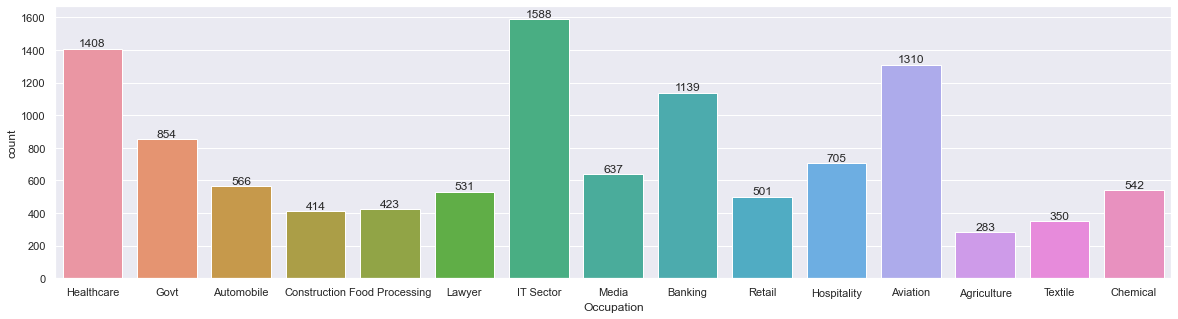

In [103]:
ax=sns.countplot(x='Occupation', data=df)
sns.set(rc={'figure.figsize':(20,5)})

for i in ax.containers:
    ax.bar_label(i)

In [105]:
sales_by_Occupation = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
print(sales_by_Occupation)

         Occupation    Amount
10        IT Sector  14838503
8        Healthcare  13034586
2          Aviation  12602298
3           Banking  10800024
7              Govt   8517212
9       Hospitality   6410224
12            Media   6295832
1        Automobile   5382224
4          Chemical   5312890
11           Lawyer   4981665
13           Retail   4783170
6   Food Processing   4070670
5      Construction   3597511
14          Textile   3219679
0       Agriculture   2593087


<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

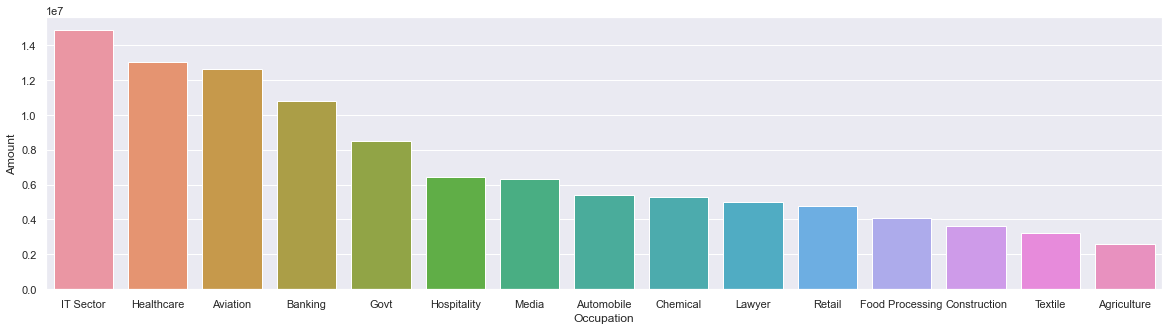

In [106]:
sns.barplot(x='Occupation', y='Amount', data=sales_by_Occupation)

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

PRODUCT CATEGORY

In [107]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount',
       'Age_group'],
      dtype='object')

<AxesSubplot:xlabel='Product_Category', ylabel='count'>

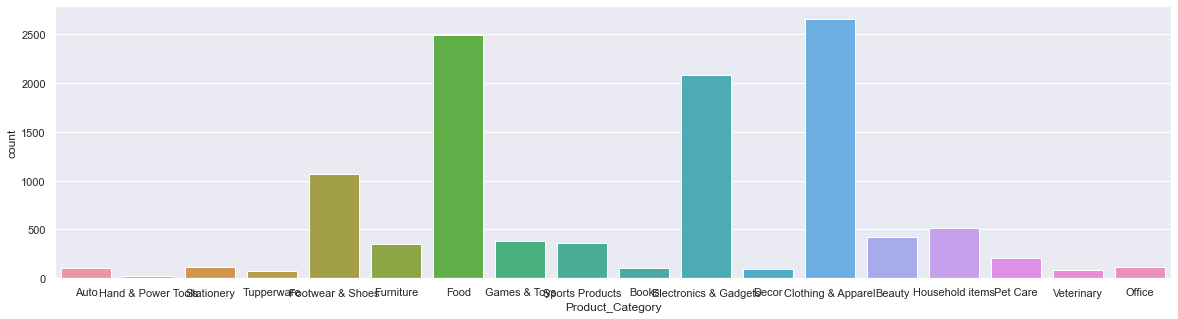

In [116]:
sns.set(rc={'figure.figsize':(20,5)})
sns.countplot(x='Product_Category', data=df)

In [117]:
sales_by_Product_Category = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
print(sales_by_Product_Category)

         Product_Category    Amount
6                    Food  33974767
3      Clothing & Apparel  16495019
7        Footwear & Shoes  15648744
5   Electronics & Gadgets  15643846
8               Furniture   5455505
9            Games & Toys   4331694
14        Sports Products   3635933
0                    Auto   2019182
1                  Beauty   1959484
15             Stationery   1676051


<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

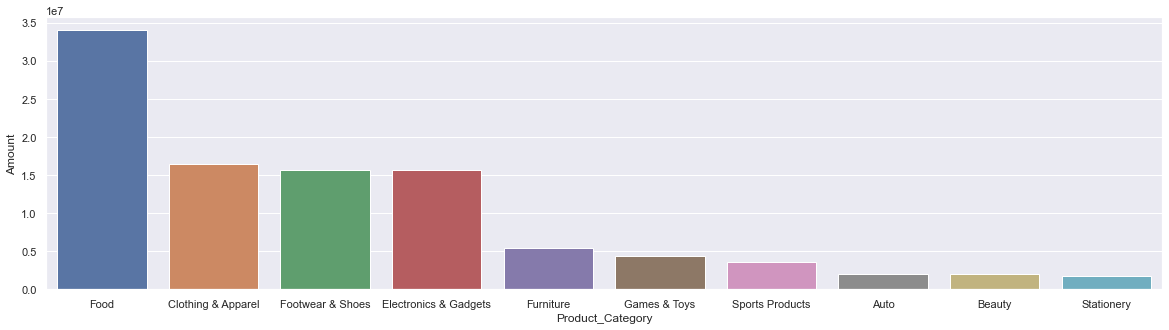

In [118]:
sns.barplot(x='Product_Category', y='Amount', data=sales_by_Product_Category)

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

In [119]:
# top 10 most sold products (same thing as above)
top_sold_product = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
print(top_sold_product)

     Product_ID  Orders
1680  P00265242     127
645   P00110942     116
1505  P00237542      91
1147  P00184942      82
680   P00114942      79
172   P00025442      79
889   P00145042      76
709   P00117942      76
299   P00044442      75
644   P00110842      74


<AxesSubplot:xlabel='Product_ID', ylabel='Orders'>

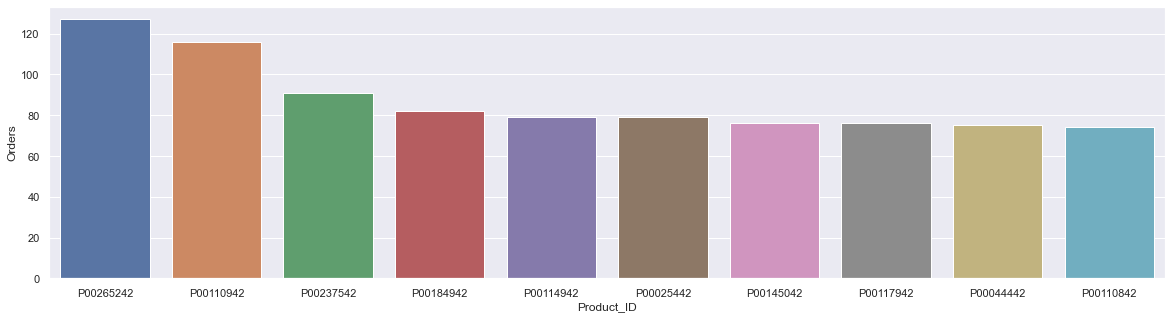

In [120]:
sns.barplot(x='Product_ID', y='Orders', data=top_sold_product)

# CONCLUSION

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*